In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# Load Plant 1 Data
plant1_gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
plant1_ws_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [19]:
# Data Cleaning
plant1_gen_data.dropna(inplace=True)
plant1_ws_data.dropna(inplace=True)
plant1_gen_data.drop_duplicates(inplace=True)
plant1_ws_data.drop_duplicates(inplace=True)

# Convert DATE_TIME column to datetime data type
plant1_gen_data['DATE_TIME'] = pd.to_datetime(plant1_gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
plant1_ws_data['DATE_TIME'] = pd.to_datetime(plant1_ws_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Merge generation and weather sensor data on DATE_TIME
plant1_data = pd.merge(plant1_gen_data, plant1_ws_data, on='DATE_TIME')

In [20]:
# Calculate avg daily yield
average_daily_yield_plant1 = plant1_gen_data.groupby(plant1_gen_data['DATE_TIME'].dt.date)['DAILY_YIELD'].mean()

# Sort in desc. order for avg daily yield
sorted_average_daily_yield_plant1 = average_daily_yield_plant1.sort_values(ascending=False)
print(sorted_average_daily_yield_plant1)

DATE_TIME
2020-05-21    4844.519541
2020-05-25    4394.764566
2020-05-23    4325.328418
2020-06-13    4122.122827
2020-05-29    4096.258698
2020-06-08    4027.107978
2020-06-09    3911.125507
2020-05-24    3873.698458
2020-05-28    3827.339586
2020-05-17    3695.106669
2020-06-07    3668.138367
2020-06-03    3666.657630
2020-05-16    3464.273323
2020-06-14    3428.334796
2020-06-15    3379.466306
2020-05-20    3356.779939
2020-05-30    3338.140278
2020-06-10    3162.781074
2020-06-16    3083.610239
2020-06-05    3069.291804
2020-06-01    3024.615471
2020-06-02    2981.198957
2020-06-04    2968.519653
2020-06-17    2968.511882
2020-05-19    2962.975236
2020-05-31    2950.626721
2020-06-12    2769.326299
2020-05-22    2739.611023
2020-06-11    2622.203675
2020-05-15    2586.279926
2020-05-27    2498.541264
2020-06-06    2474.082280
2020-05-18    2429.114465
2020-05-26    2112.023726
Name: DAILY_YIELD, dtype: float64


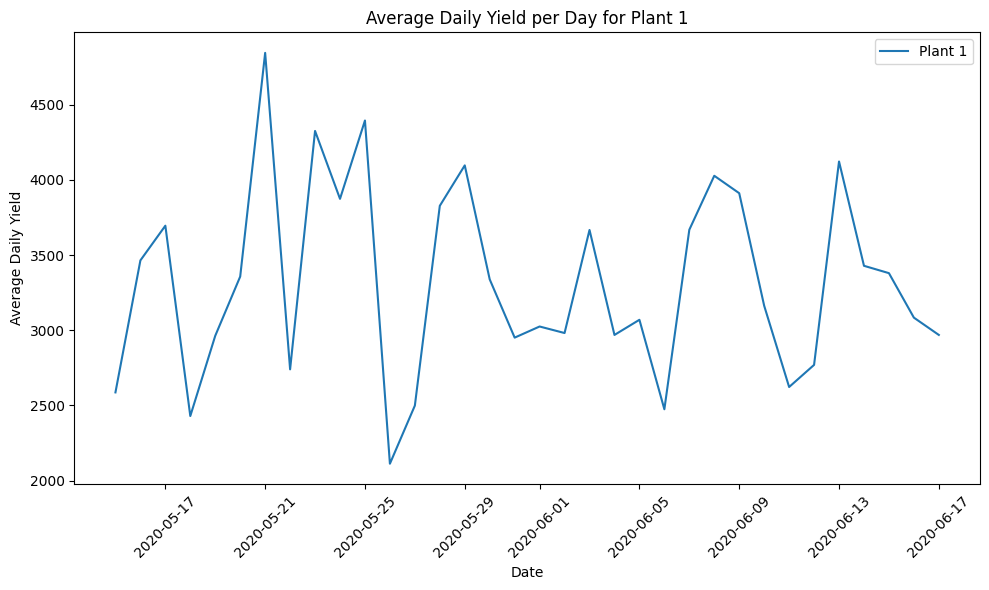

In [21]:
# Daily yield averages per day
plt.figure(figsize=(10, 6))
plt.plot(average_daily_yield_plant1.index, average_daily_yield_plant1.values, label='Plant 1')
plt.xlabel('Date')
plt.ylabel('Average Daily Yield')
plt.title('Average Daily Yield per Day for Plant 1')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# DC Power statistics
plant1_dc_power_stats = plant1_gen_data['DC_POWER'].describe()
print("Plant 1 DC Power Statistics:")
print(plant1_dc_power_stats)

Plant 1 DC Power Statistics:
count    68778.000000
mean      3147.426211
std       4036.457169
min          0.000000
25%          0.000000
50%        429.000000
75%       6366.964286
max      14471.125000
Name: DC_POWER, dtype: float64


In [23]:
# AC Power statistics
plant1_ac_power_stats = plant1_gen_data['AC_POWER'].describe()
print("Plant 1 AC Power Statistics:")
print(plant1_ac_power_stats)

Plant 1 AC Power Statistics:
count    68778.000000
mean       307.802752
std        394.396439
min          0.000000
25%          0.000000
50%         41.493750
75%        623.618750
max       1410.950000
Name: AC_POWER, dtype: float64


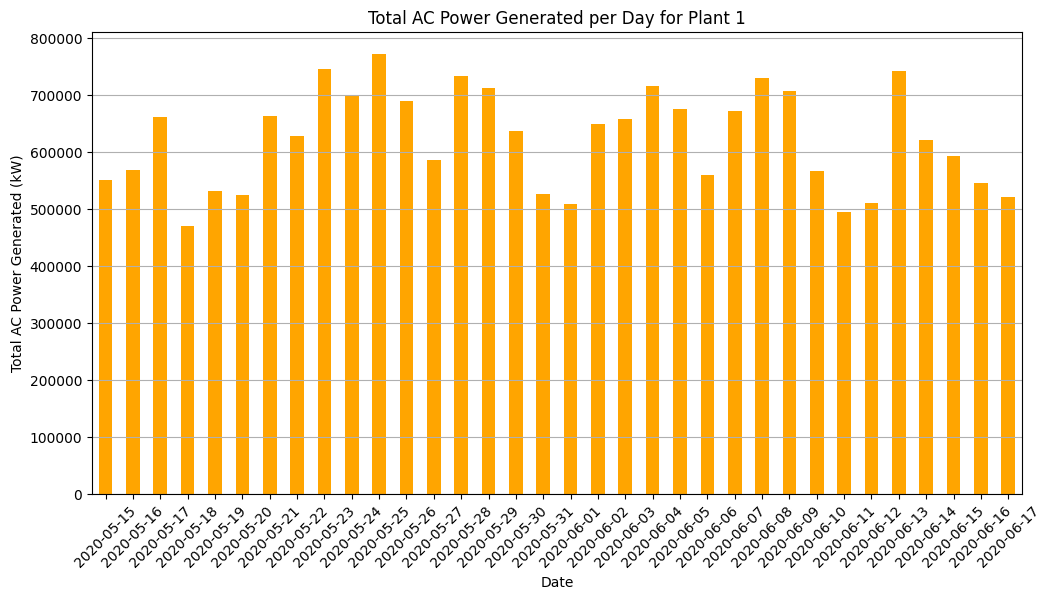

In [24]:
# Total AC Power Generated per Day
ac_power_per_day_plant1 = plant1_gen_data.groupby(plant1_gen_data['DATE_TIME'].dt.date)['AC_POWER'].sum()
plt.figure(figsize=(12, 6))
ac_power_per_day_plant1.plot(kind='bar', color='orange')
plt.title('Total AC Power Generated per Day for Plant 1')
plt.xlabel('Date')
plt.ylabel('Total AC Power Generated (kW)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

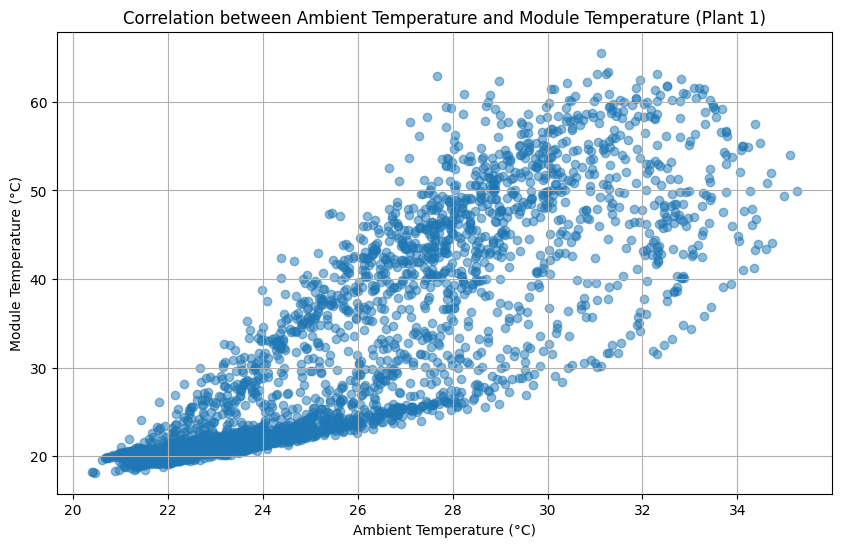

In [25]:
# Ambient Temperature vs Module Temperature
plt.figure(figsize=(10, 6))
plt.scatter(plant1_ws_data['AMBIENT_TEMPERATURE'], plant1_ws_data['MODULE_TEMPERATURE'], alpha=0.5)
plt.title("Correlation between Ambient Temperature and Module Temperature (Plant 1)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Module Temperature (°C)")
plt.grid(True)
plt.show()

In [26]:
# Drop DC_POWER because it's correlated with AC_POWER
features = plant1_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
target = plant1_data['AC_POWER']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [27]:
# Linear Regression (LR)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree Regression (DT Regression)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [28]:
# Model Eval
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Evaluate LR
mae_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print("Linear Regression Evaluation:")
print(f"MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, R2: {r2_lr}")

Linear Regression Evaluation:
MAE: 26.30905127625156, MSE: 3081.630731049853, RMSE: 55.512437624822894, R2: 0.9800288894346422


In [29]:
# Evaluate DT Regression
mae_dt, mse_dt, rmse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
print("Decision Tree Regression Evaluation:")
print(f"MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R2: {r2_dt}")

Decision Tree Regression Evaluation:
MAE: 16.374379377406136, MSE: 2081.052701645939, RMSE: 45.618556549346664, R2: 0.9865133310171954


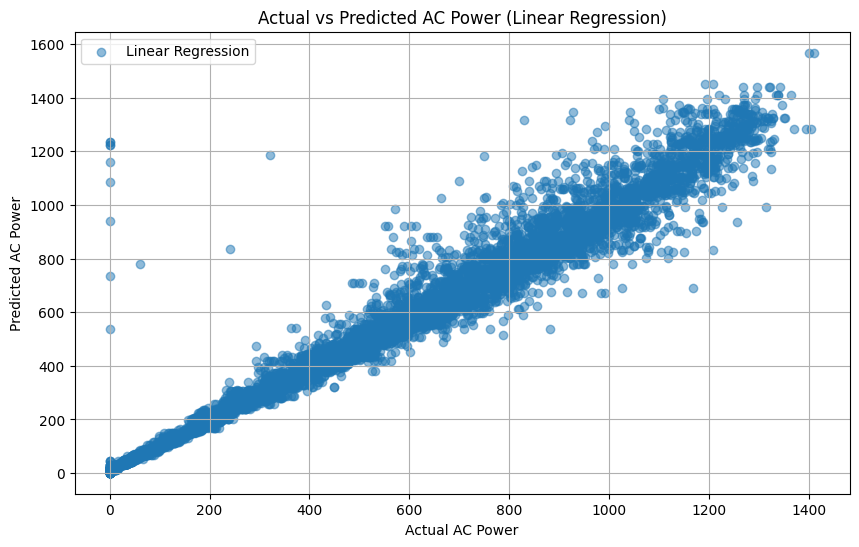

In [30]:
# Predictions vs Actuals for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.xlabel('Actual AC Power')
plt.ylabel('Predicted AC Power')
plt.title('Actual vs Predicted AC Power (Linear Regression)')
plt.grid(True)
plt.legend()
plt.show()

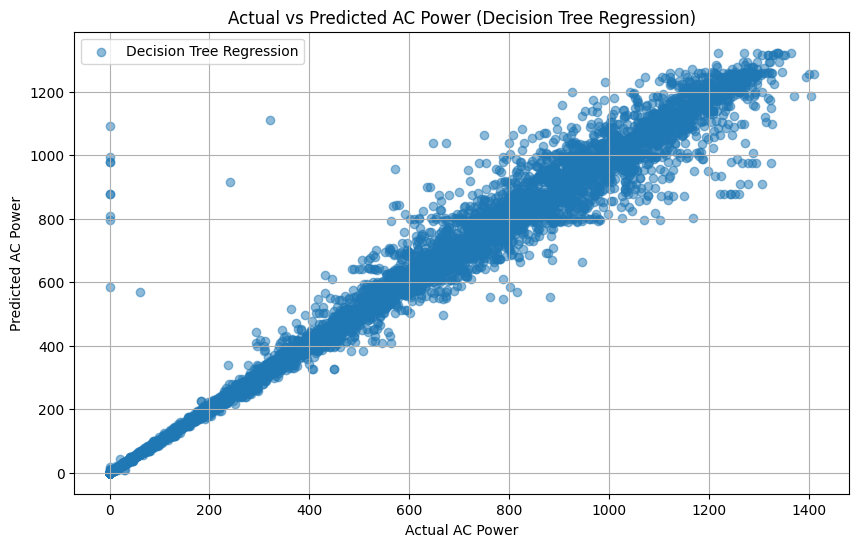

In [31]:
# Predictions vs Actuals for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Decision Tree Regression')
plt.xlabel('Actual AC Power')
plt.ylabel('Predicted AC Power')
plt.title('Actual vs Predicted AC Power (Decision Tree Regression)')
plt.grid(True)
plt.legend()
plt.show()